In [3]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



In [6]:
df_train = pd.read_csv('../data/train_resampled.csv')

In [9]:
# X = df_train.drop("loan_default", axis=1)
features = ['disbursed_amount_treated', 'pri_active_accts',  'pri_overdue_accts', 'sec_active_accts', 'sec_overdue_accts',
            'sec_current_balance', 'perform_cns_score', 'no_of_inquiries', 'age_at_disbursal', 'cns_score_unreliable',
            'credit_history_length_months', 'primary_instal_amt', 'sec_instal_amt', 'loan_default']

X = df_train[features]
y = df_train["loan_default"]

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

In [12]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [14]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

0.8724424114601879
0.8697220628023284
0.8749828159797641
0.872344508100107


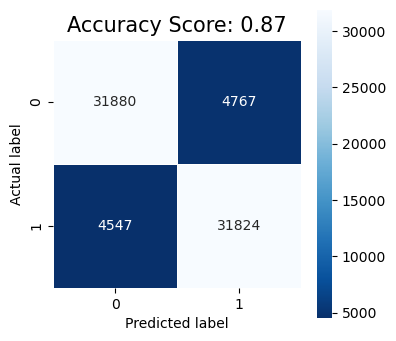

In [16]:
# Logistic Regression
logreg_y_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, logreg_y_pred)
logreg_precision = precision_score(y_test, logreg_y_pred)
logreg_recall = recall_score(y_test, logreg_y_pred)
logreg_f1 = f1_score(y_test, logreg_y_pred)

logreg_y_pred = logreg.predict(X_test)
logreg_cm = confusion_matrix(y_test, logreg_y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(logreg_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}'.format(logreg_acc)
plt.title(all_sample_title, size = 15);

print(logreg_acc)
print(logreg_precision)
print(logreg_recall)
print(logreg_f1)

0.9832507053055412
0.9832004399230134
0.9831734073850046
0.9831869234681954


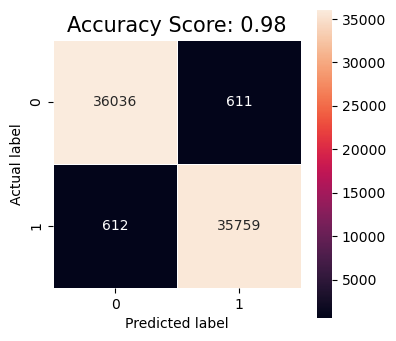

In [17]:
# Decision Tree
dt_y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)

dt_cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(dt_cm, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}'.format(dt_acc)
plt.title(all_sample_title, size = 15);


print(dt_acc)
print(dt_precision)
print(dt_recall)
print(dt_f1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9884685967843545
0.9903121636167922
0.9865002337026753
0.9884025233464644


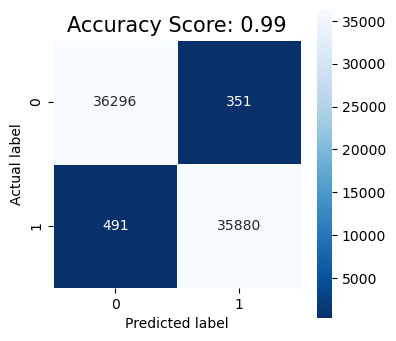

In [18]:
# K Nearest Neighbors
knn_y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)

knn_cm = confusion_matrix(y_test, knn_y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}'.format(knn_acc)
plt.title(all_sample_title, size = 15);

print(knn_acc)
print(knn_precision)
print(knn_recall)
print(knn_f1)

0.8281793530362377
0.7919515721883195
0.8884550878447115
0.8374322958509343


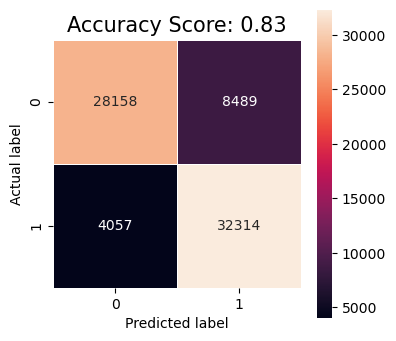

In [19]:
gb_y_pred = gnb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_y_pred)
gb_precision = precision_score(y_test, gb_y_pred)
gb_recall = recall_score(y_test, gb_y_pred)
gb_f1 = f1_score(y_test, gb_y_pred)

gb_cm = confusion_matrix(y_test, gb_y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(gb_cm, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.2f}'.format(gb_acc)
plt.title(all_sample_title, size = 15);

print(gb_acc)
print(gb_precision)
print(gb_recall)
print(gb_f1)